In [4]:
from kafka import KafkaConsumer
import json
from textblob import TextBlob
import matplotlib.pyplot as plt

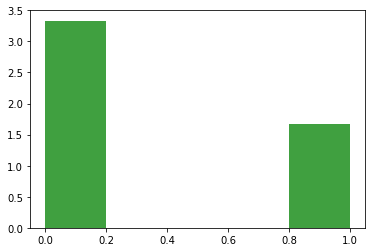

In [14]:
KAFKA_HOST = 'ip-172-31-31-133.ec2.internal:6667'
TOPIC = 'twitter'

def getTweets():
    consumer = KafkaConsumer(TOPIC, bootstrap_servers=[KAFKA_HOST], consumer_timeout_ms=100000)
    #f = open('tweet.json', 'w')
    #for message in consumer:
        #tweet = message.value.decode('utf-8')
        #print(tweet)
        #json.dump(tweet, f)
        #f.write(str(tweet))
    #f.close()
    count = 0
    for message in consumer:
        tweet = message.value.decode('utf-8')
        tweet_prop = TextBlob(tweet)
        polarity = tweet_prop.sentiment.polarity
        #print(polarity)
        positive = 0
        negative = 0
        neutral = 0
        if polarity > 0:
            positive += 1
        elif polarity == 0:
            neutral += 1
        else:
            negative += 1
        count += 1
        if count == 10:
            plt.hist([positive, neutral, negative], 5, normed=1, facecolor='green', alpha=0.75)
            plt.show()
            break
    
if __name__ == '__main__':
    getTweets()